In [1]:
import numpy as np
import h5py
import time
import matplotlib.pyplot as plt
from tqdm import trange

# Data processing and generation

## Read data from file

In [2]:
f = h5py.File("C:\\Users\\arnau\\Desktop\\nose_data_35_153.mat")
reading_time = time.time()
data = np.asarray(f["nose"])
reading_time = time.time() - reading_time
print("[--] Data read in {}s!".format(round(reading_time, 4)))
f.close()

[--] Data read in 0.1783s!


In [6]:
data.shape

(2600, 35, 153)

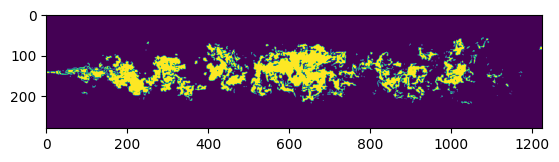

In [4]:
# Plot sample
plt.imshow((data[1,:,:] > 3e-6))

## Reducing size

In [5]:
def reduce_size(data, times):
    resized_data = data
    for _ in trange(times):
        data_shape = resized_data.shape
        x_len = data_shape[1] - (data_shape[1] % 2)
        y_len = data_shape[2] - (data_shape[2] % 2)

        data_0 = resized_data[:, 0:x_len:2, 0:y_len:2] / 4
        data_1 = resized_data[:, 1:x_len:2, 0:y_len:2] / 4
        data_2 = resized_data[:, 0:x_len:2, 1:y_len:2] / 4
        data_3 = resized_data[:, 1:x_len:2, 1:y_len:2] / 4

        resized_data = data_0 + data_1 + data_2 + data_3

    return resized_data

In [6]:
resized_data = reduce_size(data=data, times=3)

  0%|          | 0/3 [00:00<?, ?it/s]

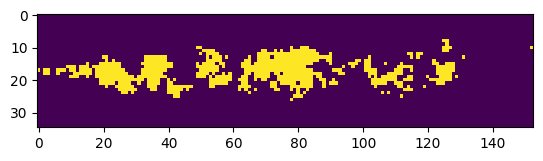

In [ ]:
plt.imshow(resized_data[0] > 3e-6)

In [ ]:
resized_data.shape

(2600, 35, 153)

This gives about 5k states. Let's save this data for the simulation

In [ ]:
# hf = h5py.File('./Data/' + 'nose_data_35_153.mat', 'w')
# hf.create_dataset('nose', data=resized_data)
# hf.close()

## Filtering to threshold and building stats

In [ ]:
threshold = 3e-6
stat_data = np.average(resized_data >= threshold, axis=0)

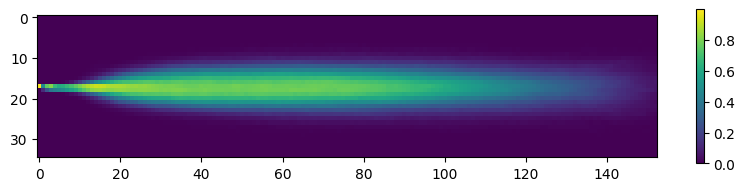

In [74]:
plt.figure(figsize=(10,2))
plt.imshow(stat_data)
plt.colorbar()

## Saving

In [84]:
file_name = './Data/statistics_nose_3e6_35_153.dat'

In [85]:
import pandas as pd
df = pd.DataFrame(stat_data)
df.to_csv(file_name, index=False, header=False)